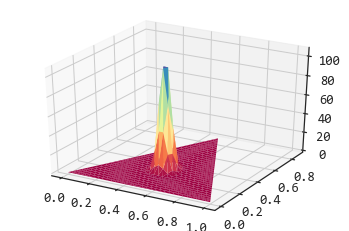

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
from math import gamma
from operator import mul
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D

sns.set(style='white', font_scale=1.2, font='consolas')
        
        
class Dirichlet:
    """Define the Dirichlet distribution with vector parameter alpha."""
    def __init__(self, alpha):
        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    
    def pdf(self, x):
        """Returns pdf value for `x`. """
        return self._coef * reduce(mul, [xx ** (aa-1) for (xx, aa) in zip(x, self._alpha)])
        
        
class PlotDirichlet:
    """
    Plot the Dirichlet distribution as a surface plot on a 2-Simplex.
    """
    def __init__(self, corners):
        self._corners = corners
        self._triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
        # Midpoints of triangle sides opposite of each corner
        self._midpoints = [(corners[(i+1) % 3] + corners[(i+2) % 3]) / 2.0 for i in range(3)]
        
    def xy2bc(self, xy, tol=1.e-3):
        """Map the x-y coordinates of the mesh vertices to the simplex coordinate space (aka barycentric coordinates).
        Here we use a simple method that uses vector algebra. For some values of alpha, calculation of the Dirichlet pdf 
        can become numerically unstable at the boundaries of the simplex so our conversion function will take an optional 
        tolerance that will avoid barycentric coordinate values directly on the simplex boundary.        
        """
        s = [(self._corners[i] - self._midpoints[i]).dot(xy - self._midpoints[i]) / 0.75 for i in range(3)]
        return np.clip(s, tol, 1.0-tol)

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
plot_dirichlet = PlotDirichlet(corners)

fig = plt.figure()
ax = fig.gca(projection='3d')

alpha = (50, 50, 50)
dist = Dirichlet(alpha)

refiner = tri.UniformTriRefiner(plot_dirichlet._triangle)
trimesh = refiner.refine_triangulation(subdiv=5)

pvals = [dist.pdf(plot_dirichlet.xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

ax.plot_trisurf(trimesh.x, trimesh.y, pvals, linewidth=0, antialiased=True, 
    edgecolor='none', cmap=plt.cm.Spectral)

plt.show()

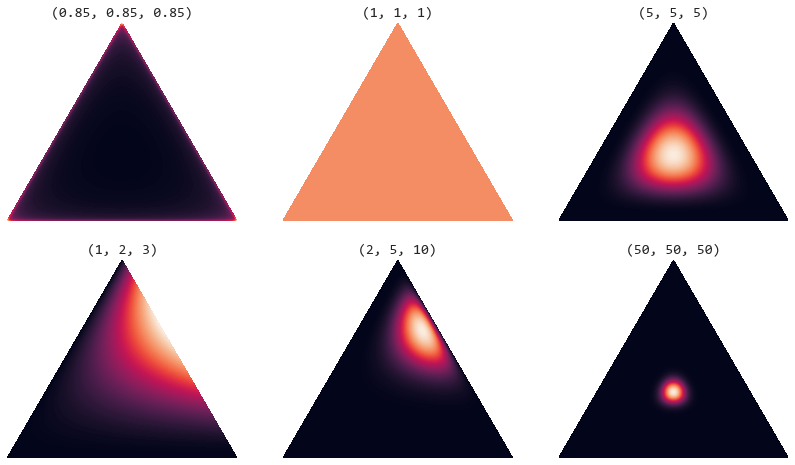

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
from math import gamma
from operator import mul
from functools import reduce
import os

sns.set(style='white', font_scale=1.2, font='consolas')

        
class Dirichlet:
    """Define the Dirichlet distribution with vector parameter alpha."""
    def __init__(self, alpha):
        
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    
    def pdf(self, x):
        """Returns pdf value for `x`. """
        return self._coef * reduce(mul, [xx ** (aa-1) for (xx, aa) in zip(x, self._alpha)])
        
        
class PlotDirichlet:
    """
    Plot the Dirichlet distribution as a contour plot on a 2-Simplex.
    """
    def __init__(self, corners):
        self._corners = corners
        self._triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
        # Midpoints of triangle sides opposite of each corner
        self._midpoints = [(corners[(i+1) % 3] + corners[(i+2) % 3]) / 2.0 for i in range(3)]
        
    def xy2bc(self, xy, tol=1.e-3):
        """Map the x-y coordinates of the mesh vertices to the simplex coordinate space (aka barycentric coordinates).
        Here we use a simple method that uses vector algebra. For some values of alpha, calculation of the Dirichlet pdf 
        can become numerically unstable at the boundaries of the simplex so our conversion function will take an optional 
        tolerance that will avoid barycentric coordinate values directly on the simplex boundary.        
        """
        s = [(self._corners[i] - self._midpoints[i]).dot(xy - self._midpoints[i]) / 0.75 for i in range(3)]
        return np.clip(s, tol, 1.0-tol)
        
    def draw_pdf_contours(self, ax, dist, label=None, nlevels=200, subdiv=8, **kwargs):
        """Draw pdf contours for a Dirichlet distribution"""
        # Subdivide the triangle into a triangular mesh
        refiner = tri.UniformTriRefiner(self._triangle)
        trimesh = refiner.refine_triangulation(subdiv=subdiv)
        
        # convert to barycentric coordinates and compute probabilities of the given distribution 
        pvals = [dist.pdf(self.xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

        ax.tricontourf(trimesh, pvals, nlevels, **kwargs)
        #plt.axis('equal')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 0.75**0.5)
        ax.set_title(str(label))
        ax.axis('off') 
        return ax

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
plot_dirichlet = PlotDirichlet(corners)
f, axes = plt.subplots(2, 3, figsize=(14, 8))
ax = axes[0, 0]
alpha = (0.85, 0.85, 0.85)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
ax = axes[0, 1]
alpha = (1, 1, 1)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
ax = axes[0, 2]
alpha = (5, 5, 5)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
ax = axes[1, 0]
alpha = (1, 2, 3)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
ax = axes[1, 1]
alpha = (2, 5, 10)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
ax = axes[1, 2]
alpha = (50, 50, 50)
dist = Dirichlet(alpha)
ax = plot_dirichlet.draw_pdf_contours(ax, dist, alpha)
f.savefig(os.path.join('images\Dirichlet', 'Dirichlet_tri_contour.png'), 
          bbox_inches='tight', transparent=True)